In [1]:
from ctypes import windll

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
img = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\fp.tif', 0)

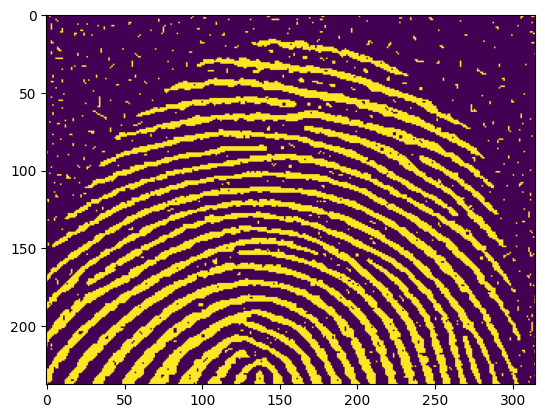

In [7]:
plt.imshow(img)

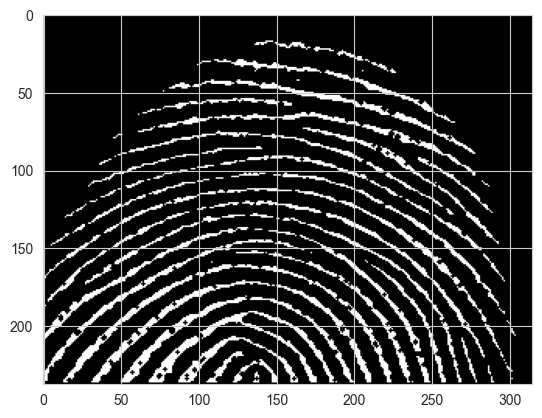

In [3]:
def erosion_filter(img, strut_ele):
    step = strut_ele.shape[0] // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)
    for i in range(step, padded_img.shape[0] - step):
        for j in range(step, padded_img.shape[1] - step):
            window = padded_img[i-step: i+step+1, j-step: j+step+1]
            if np.all(window[strut_ele == 1] == 255):
                output[i - step, j - step] = 255
            else:
                output[i - step, j - step] = 0
    return output
se = np.array([[0,1,0],
               [1,1,1],
               [0,1,0]])
img = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\fp.tif', 0)
erosion_img = erosion_filter(img,se )
plt.imshow(erosion_img, cmap='gray')


Text(0.5, 1.0, 'Dialated Img')

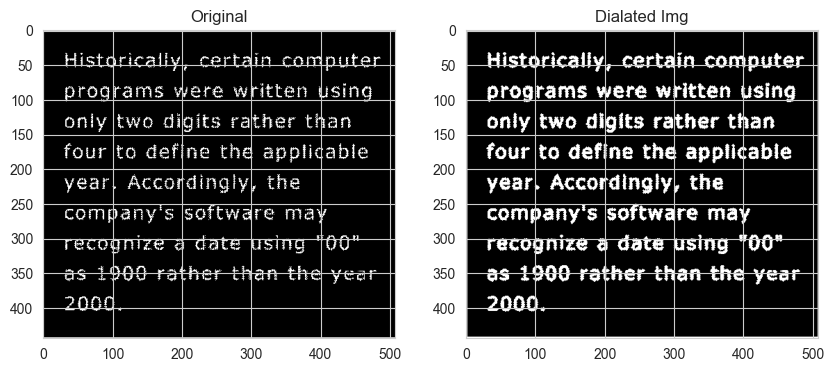

In [4]:
def dialation_filter(img, strut_ele):
    step = strut_ele.shape[0] // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(step, padded_img.shape[0] - step):
        for j in range(step, padded_img.shape[1] - step):
            window = padded_img[i-step: i+step+1, j-step: j+step+1]
            if np.any(window[strut_ele == 1] == 255):
                output[i - step, j - step] = 255
            else:
                output[i - step, j - step] = 0
    return output
img2 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\broken_text.tif', 0)
dial_img = dialation_filter(img2, se)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(dial_img, cmap='gray')
axes[1].set_title("Dialated Img")


Task 3

Text(0.5, 1.0, 'Dialated Img')

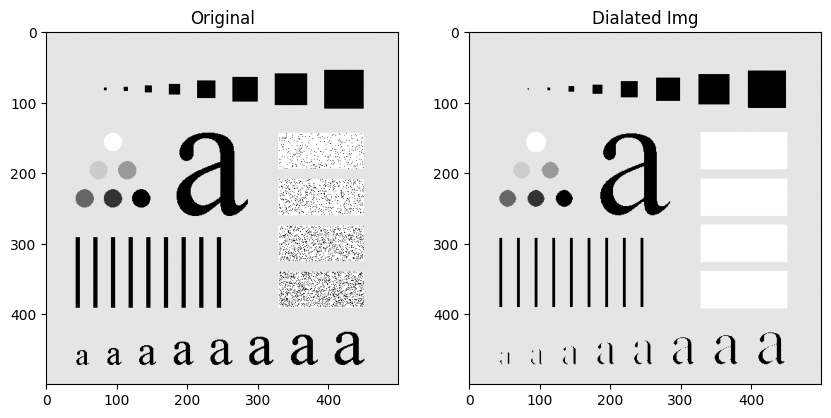

In [25]:
def max_filter(img):
    return np.max(img)
def dialation_filter_task_03(img, size):
    step = size // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(step, padded_img.shape[0]- step):
        for j in range(step, padded_img.shape[1]-step):
            window = padded_img[i-step:i+step+1, j-step: j+step+1]
            output[i-1,j-1] = max_filter(window)
    return output

img2 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\Fig01.tif', 0)
dial_img = dialation_filter_task_03(img2, 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img2, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(dial_img, cmap='gray')
axes[1].set_title("Dialated Img")


Text(0.5, 1.0, 'Dialated Img')

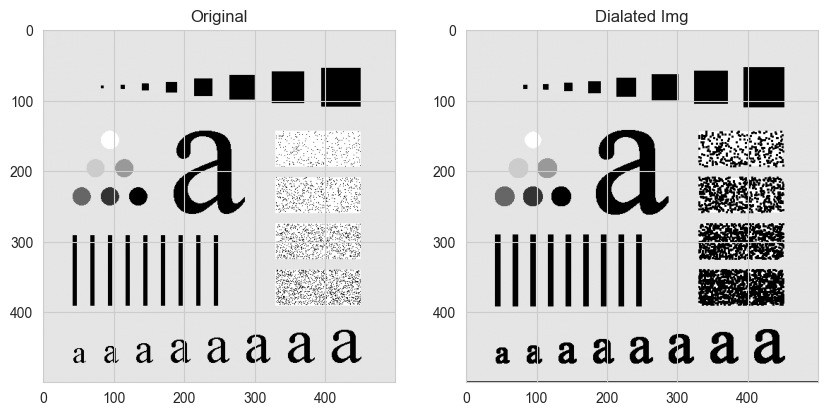

In [5]:
def min_filter(img):
    return np.min(img)
def erosion_filter_task_03(img, size):
    step = size // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(step, padded_img.shape[0]- step):
        for j in range(step, padded_img.shape[1]-step):
            window = padded_img[i-step:i+step+1, j-step: j+step+1]
            output[i-step,j-step] = min_filter(window)
    return output

img3 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\Fig01.tif', 0)
dial_img = erosion_filter_task_03(img3, 3)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img3, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(dial_img, cmap='gray')
axes[1].set_title("Dialated Img")


Text(0.5, 1.0, 'Dialated Img')

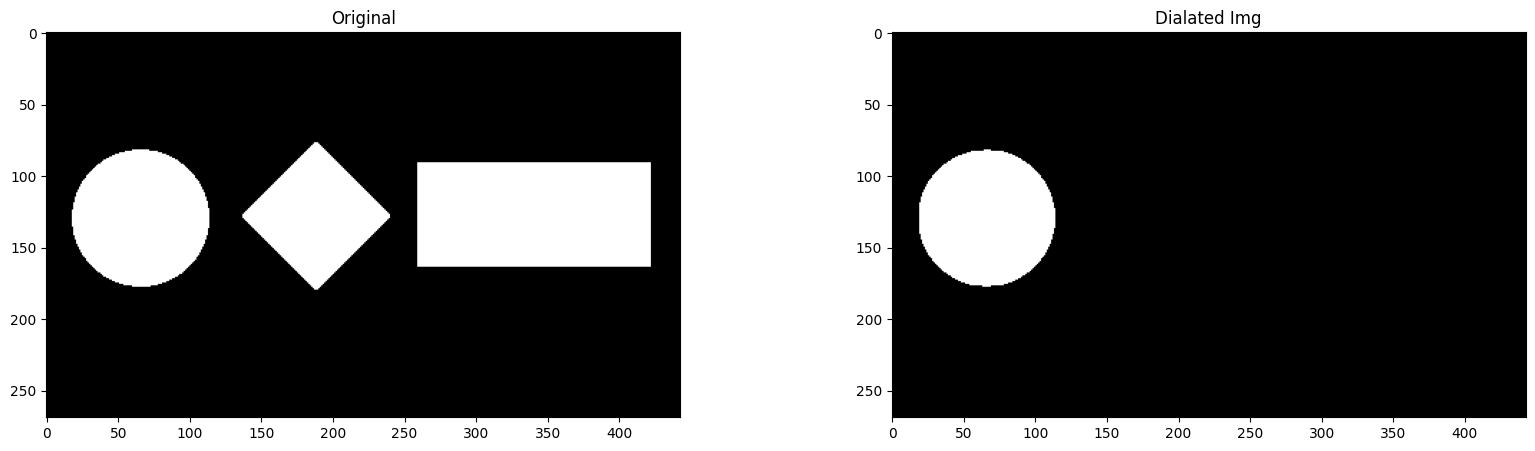

In [46]:
img4 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\Objects.png', 0)
size = 77
se_4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
circle_img = erosion_filter(img4, se_4)
circle_dial_img = dialation_filter(circle_img, se_4)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(img4, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(circle_dial_img, cmap='gray')
axes[1].set_title("Dialated Img")

Text(0.5, 1.0, 'Dialated Img')

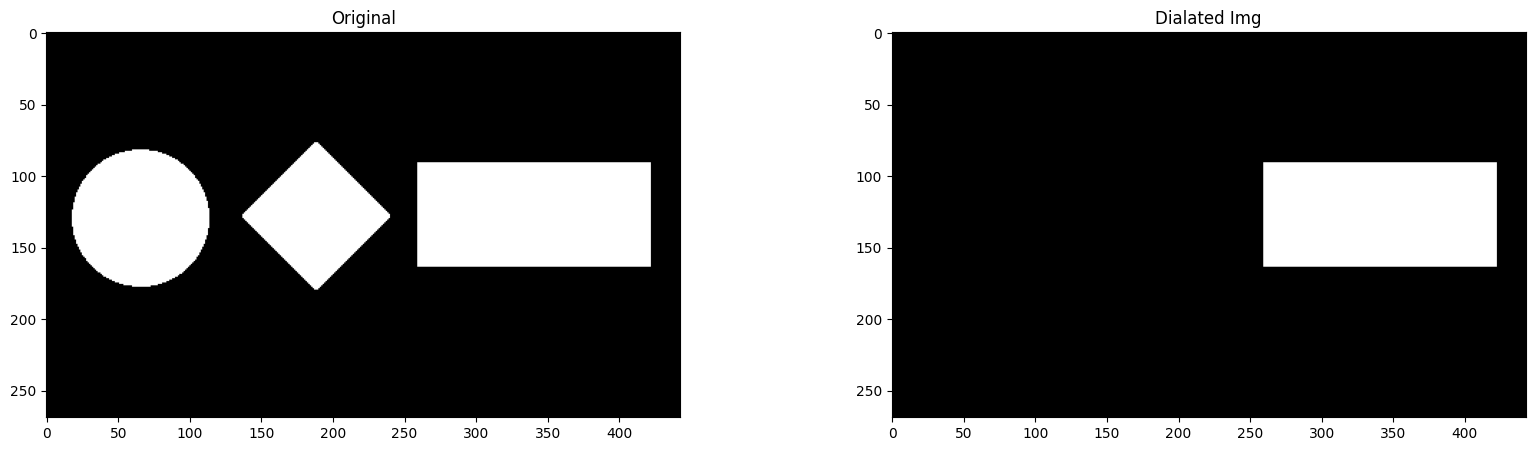

In [50]:
img4 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\Objects.png', 0)
size = 71
se_4 = cv2.getStructuringElement(cv2.MORPH_RECT, (size, size))
rect_img = erosion_filter(img4, se_4)
rect_dial_img = dialation_filter(rect_img, se_4)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(img4, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(rect_dial_img, cmap='gray')
axes[1].set_title("Dialated Img")

Text(0.5, 1.0, 'Dialated Img')

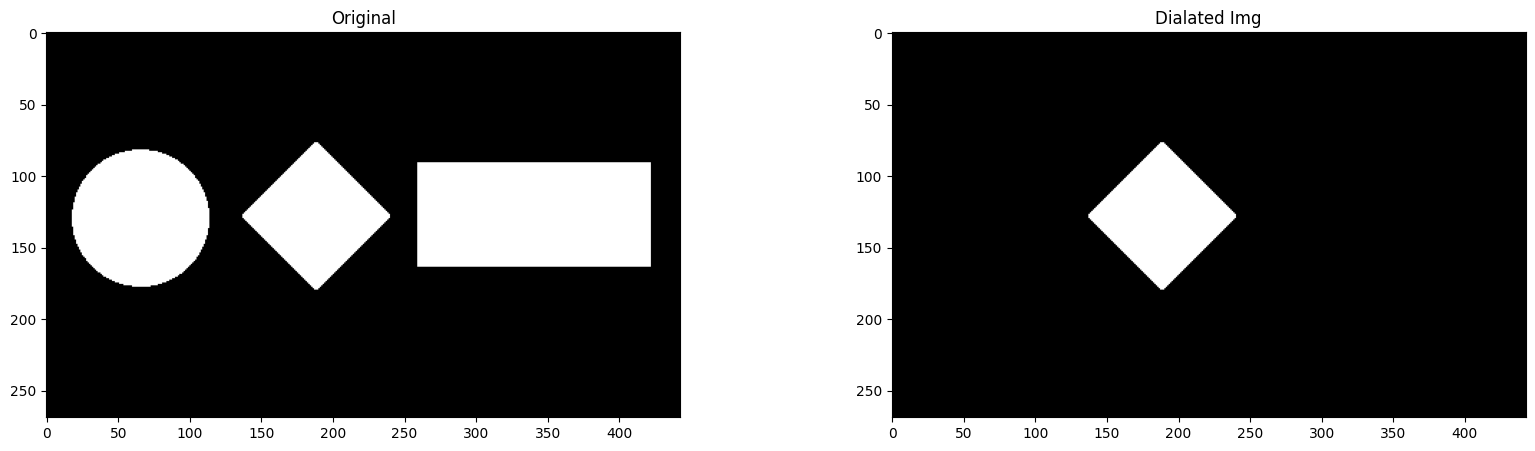

In [109]:
img4 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\Objects.png', 0)
size = 101
center = size // 2
kernal = np.zeros((size, size))


for i in range(size):
    for j in range(size):
        if abs(i - center)  + abs(j - center) <= center:
            kernal[i][j] = 1

diam_img = erosion_filter(img4, kernal)
diam_dial_img = dialation_filter(diam_img, kernal)
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].imshow(img4, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(diam_dial_img, cmap='gray')
axes[1].set_title("Dialated Img")

Task 5

Text(0.5, 1.0, 'Dialated Img')

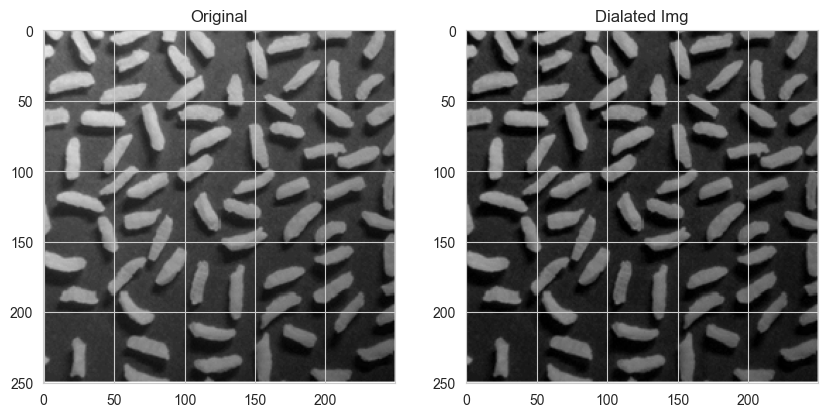

In [6]:
def min_filter(img):
    return np.min(img)

def max_filter(img):
    return np.max(img)
def dialation_filter_task_03(img, size):
    step = size // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(step, padded_img.shape[0]- step):
        for j in range(step, padded_img.shape[1]-step):
            window = padded_img[i-step:i+step+1, j-step: j+step+1]
            output[i-step,j-step] = max_filter(window)
    return output

def erosion_filter_task_03(img, size):
    step = size // 2
    padded_img = np.pad(img, step, mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(step, padded_img.shape[0]- step):
        for j in range(step, padded_img.shape[1]-step):
            window = padded_img[i-step:i+step+1, j-step: j+step+1]
            output[i-step,j-step] = min_filter(window)
    return output


img5 = cv2.imread('E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Lab 9\\rice.png', 0)

erosion_img = erosion_filter_task_03(img5, 41)
dial_img = dialation_filter_task_03(erosion_img, 41)

new_img = img5-dial_img
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img5, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(new_img, cmap='gray')
axes[1].set_title("Dialated Img")
